In [ ]:
import pandas as pd

resto = pd.read_excel("restoran.xlsx")
resto

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


In [ ]:
#Define data
id = resto["id"]
pelayanan = resto["pelayanan"]
makanan = resto["makanan"]

In [ ]:
y = []

for x in range(100):
    #Bagian pelayanan
    nilaiP = [0, 0, 0]
    buruk = biasa = baik = 0
    #Fuzifikasi data pelayanan
    if pelayanan[x]<=25 :
        buruk = 1
        nilaiP[0] = buruk
    elif pelayanan[x]>25 and pelayanan[x]<50 :
        buruk = (50-pelayanan[x])/(50-25)
        biasa = (pelayanan[x]-25)/(50-25)
        nilaiP[0] = buruk
        nilaiP[1] = biasa
    elif pelayanan[x]>=50 and pelayanan[x]<=65 :
        biasa = 1
        nilaiP[1] = biasa
    elif pelayanan[x]>65 and pelayanan[x]<=80 :
        biasa = (80-pelayanan[x])/(80-65)
        baik = (pelayanan[x]-65)/(80-65)
        nilaiP[1] = biasa
        nilaiP[2] = baik
    elif pelayanan[x]>80 and pelayanan[x]<=100 :
        baik = 1
        nilaiP[2] = baik
    #Bagian makanan
    nilaiM = [0, 0, 0]
    tidakenak = standar = enak = 0
    #Fuzifikasi data makanan
    if makanan[x]<=2 :
        tidakenak = 1
        nilaiM[0] = tidakenak
    elif makanan[x]>2 and makanan[x]<4 :
        tidakenak = (4-makanan[x])/(4-2)
        standar = (makanan[x]-2)/(4-2)
        nilaiM[0] = tidakenak
        nilaiM[1] = standar
    elif makanan[x]>=4 and makanan[x]<=6 :
        standar = 1
        nilaiM[1] = standar
    elif makanan[x]>6 and makanan[x]<8 :
        standar = (8-makanan[x])/(8-6)
        standar = (makanan[x]-6)/(8-6)
        nilaiM[1] = standar
        nilaiM[2] = enak
    elif makanan[x]>=8 and makanan[x]<=10 :
        enak = 1
        nilaiM[2] = enak
    #Inferensi
    rendah = []
    if nilaiM[0] == tidakenak and nilaiP[0] == buruk :
        rendah.append(min(nilaiP[0], nilaiM[0]))
    if nilaiM[0] == tidakenak and nilaiP[1] == biasa :
        rendah.append(min(nilaiP[1], nilaiM[0]))
    if nilaiM[1] == standar and nilaiP[0] == buruk :
        rendah.append(min(nilaiP[0], nilaiM[1]))
    nilairendah = max(rendah)
    sedang = []
    if nilaiM[0] == tidakenak and nilaiP[2] == baik :
        sedang.append(min(nilaiP[2], nilaiM[0]))
    if nilaiM[1] == standar and nilaiP[1] == biasa :
        sedang.append(min(nilaiP[1], nilaiM[1]))
    if nilaiM[2] == enak and nilaiP[0] == buruk :
        sedang.append(min(nilaiP[0], nilaiM[2]))
    nilaisedang = max(sedang)
    tinggi = []
    if nilaiM[1] == standar and nilaiP[2] == baik :
        tinggi.append(min(nilaiP[2], nilaiM[1]))
    if nilaiM[2] == enak and nilaiP[1] == biasa :
        tinggi.append(min(nilaiP[1], nilaiM[2]))
    if nilaiM[2] == enak and nilaiP[2] == baik :
        tinggi.append(min(nilaiP[2], nilaiM[2]))
    nilaitinggi = max(tinggi)
    #Defuzifikasi
    pembagi = nilairendah+nilaisedang+nilaitinggi
    z = ((nilairendah*25)+(nilaisedang*50)+(nilaitinggi*100))/pembagi
    print(id[x], z)
    y.append([id[x], z])

1 50.0
2 25.0
3 50.0
4 50.0
5 25.0
6 100.0
7 100.0
8 60.0
9 25.0
10 72.0
11 25.0
12 37.755102040816325
13 75.0
14 62.0
15 93.33333333333334
16 100.0
17 53.125
18 50.0
19 37.5
20 98.0
21 25.0
22 100.0
23 25.0
24 100.0
25 100.0
26 25.0
27 100.0
28 37.5
29 50.0
30 25.0
31 100.0
32 37.5
33 66.0
34 100.0
35 25.0
36 32.0
37 31.0
38 25.0
39 50.0
40 25.0
41 24.999999999999996
42 100.0
43 35.46511627906977
44 25.0
45 50.0
46 25.0
47 25.0
48 50.0
49 25.0
50 42.0
51 96.0
52 75.0
53 25.0
54 100.0
55 50.0
56 37.5
57 25.0
58 25.0
59 28.0
60 96.66666666666666
61 42.0
62 33.108108108108105
63 89.47368421052632
64 25.0
65 50.0
66 50.0
67 27.0
68 50.0
69 100.0
70 100.0
71 37.5
72 26.0
73 50.0
74 50.0
75 25.0
76 45.0
77 50.0
78 25.0
79 100.0
80 78.0
81 50.0
82 25.0
83 100.0
84 25.0
85 25.0
86 30.0
87 50.0
88 50.0
89 25.0
90 25.0
91 75.0
92 75.0
93 80.0
94 25.0
95 100.0
96 25.0
97 25.0
98 54.0
99 25.0
100 50.0


In [ ]:
#Output
hasilakhir = sorted(y, key = lambda x: x[1], reverse=True)
hasil = ('Restoran terbaik', hasilakhir[:10])
result = pd.DataFrame(hasil, columns=['Restoran terbaik'])
result.to_excel('peringkat.xlsx')
print(result)

                                    Restoran terbaik
0                                   Restoran terbaik
1  [[6, 100.0], [7, 100.0], [16, 100.0], [22, 100...


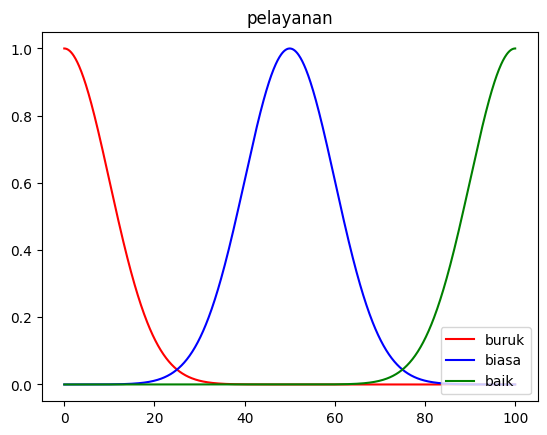

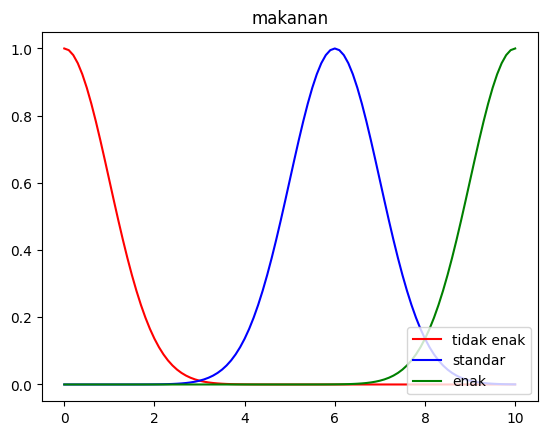

In [ ]:
import matplotlib.pyplot as plt

def fuzzy_linguistics(x, value):
    pi = 3.14
    e = 2.71
    power = -1 * ((x - value[0]) ** 2) / (2 * value[1] ** 2)
    return e ** power
  
def plotlinguistics(value, colors, label='', min=0, max=1):
    x = []
    y = []
    i = min
    while i < max:
        x.append(i)
        y.append(fuzzy_linguistics(i, value))
        i += 0.1
    plt.plot(x, y, colors, label=label)

def memberlinguisticsgraph(membership, min=0, max=1):
    colors = ['r', 'b', 'g', 'y']

    # Plot each linguistics
    i = 0
    for lings in membership:
        plotlinguistics(membership[lings], colors[i], lings, min, max)
        i += 1
    plt.legend(loc=4)
    plt.show()

#Linguistics value service
pelayanan = {
    'buruk'      : [ 0, 10 ],
    'biasa' : [ 50, 10 ],
    'baik'     : [ 100, 10 ]
}

#Linguistics value food
makanan = {
    'tidak enak'  : [0, 1],
    'standar'    : [6, 1],
    'enak'       : [10, 1]   
}
plt.title('pelayanan')
memberlinguisticsgraph(pelayanan, max=100)
plt.title('makanan')
memberlinguisticsgraph(makanan, max=10)